1. It is believed that variables "BMI" and "AgeCategory" are key indicators of "KidneyDisease". Is this true?
Considering that we would want to calculate the probability that someone has kidney disease given that their BMI is above a certain threshold or that they fall into a certain age category, thus proving as indicators, we can use conditional probability to achieve that.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pointbiserialr

data = pd.read_csv("Assignment 4_Remedial.csv")
data.head(8)
# this gives a general overview of how the data is represented and specifically for our two variables, AgeCategory and BMI which are in ranges and continous values respectively.

# Chi-square test: AgeCategory and KidneyDisease
age_kidney_contingency = pd.crosstab(data['AgeCategory'], data['KidneyDisease'])
chi2_stat, p_val_age, dof, expected = chi2_contingency(age_kidney_contingency)

# Point-biserial correlation: BMI and KidneyDisease (encoded as 0 and 1)
data['KidneyDisease_encoded'] = data['KidneyDisease'].apply(lambda x: 1 if x == 'Yes' else 0)
corr_bmi_kidney, p_val_bmi = pointbiserialr(data['BMI'], data['KidneyDisease_encoded'])

# Output results
print(f"Chi-square statistic (AgeCategory vs KidneyDisease): {chi2_stat}")
print(f"p-value (AgeCategory vs KidneyDisease): {p_val_age}")
print(f"Point-biserial correlation (BMI vs KidneyDisease): {corr_bmi_kidney}")
print(f"p-value (BMI vs KidneyDisease): {p_val_bmi}")

# A Chi-square statistic of 5198.26 and a p-value of 0.0 indicate that there is a strong association between "AgeCategory" and "KidneyDisease" which means AgeCategory is a key indicator of kidney disease.
# A correlation coefficient of 0.051 indicates a very weak positive relationship, meaning that "BMI" has only a minor connection to "KidneyDisease", however, the p-value is significant (≈ 0), suggesting that while the relationship is statistically significant, it is not practically strong. Thus, BMI is not a strong indicator of kidney disease.


Chi-square statistic (AgeCategory vs KidneyDisease): 5198.26259786746
p-value (AgeCategory vs KidneyDisease): 0.0
Point-biserial correlation (BMI vs KidneyDisease): 0.05076753286252816
p-value (BMI vs KidneyDisease): 1.7223211697586984e-181


2. Explain the distribution of probability of any continuous variable
You can use a histogram to visualize the distribution of a continuous variable like "BMI"

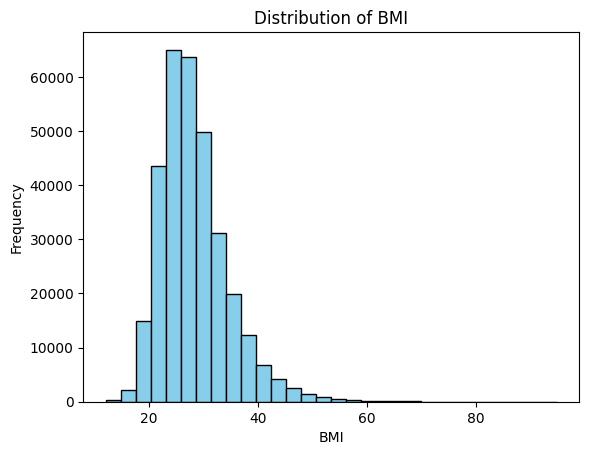

In [2]:
import matplotlib.pyplot as plt

# Plot distribution of BMI
plt.hist(data['BMI'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# This histogram shows the distribution of the continuous variable BMI.
# The plot shows a normal distribution as most individuals have BMI values near the mean, and fewer individuals have very high or very low BMI which assesses skewness.


3. What is the probability that a person who smokes has SkinCancer

In [3]:
# Calculate probability that a person who smokes has SkinCancer
smokers = data[data['Smoking'] == 'Yes']
smokers_with_skin_cancer = smokers[smokers['SkinCancer'] == 'Yes']

prob_skin_cancer_given_smoking = len(smokers_with_skin_cancer) / len(smokers)
print(f"Probability that a person who smokes has SkinCancer: {prob_skin_cancer_given_smoking:.4f}")

# The probability calculation reveals that 10.5% of smokers in the dataset have skin cancer through conditional probability P(SkinCancer∣Smoking), meaning the likelihood of skin cancer given that the person smokes which provides insight into the risk associated with smoking, though other variables might also contribute to skin cancer development

Probability that a person who smokes has SkinCancer: 0.1050


4. Explain the relationship between any two continuous variables

In [4]:
# Pearson correlation between BMI and PhysicalHealth
corr_bmi_physical_health = data['BMI'].corr(data['PhysicalHealth'])
print(f"Pearson correlation (BMI vs PhysicalHealth): {corr_bmi_physical_health}")

# The Pearson correlation measures the linear relationship between two continuous variables and our value is near 0 which indicates no linear relationship hence increasing BMI is associated with fewer physical health problems. 

Pearson correlation (BMI vs PhysicalHealth): 0.10978754360968293


5. Based on the variable "HeartDisease", which "GenHealth" status would you advise patients to maintain?

GenHealth
Excellent    0.022441
Fair         0.204285
Good         0.102632
Poor         0.341040
Very good    0.047261
Name: HeartDisease, dtype: float64


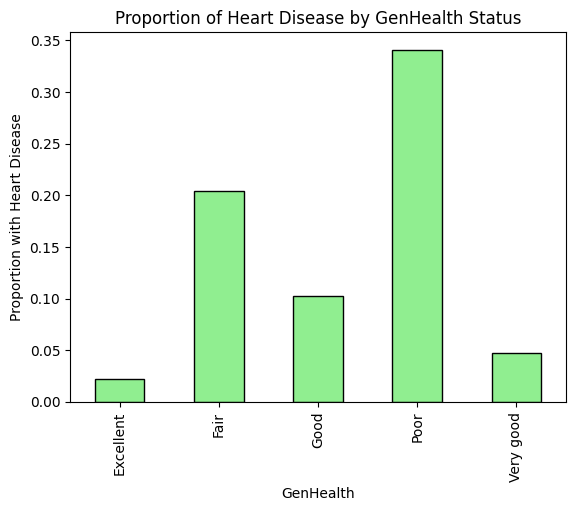

In [5]:
# Calculate the proportion of HeartDisease for each GenHealth status
heart_disease_proportion = data.groupby('GenHealth')['HeartDisease'].apply(lambda x: (x == 'Yes').mean())
print(heart_disease_proportion)

# Plot the proportions
heart_disease_proportion.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Proportion of Heart Disease by GenHealth Status')
plt.xlabel('GenHealth')
plt.ylabel('Proportion with Heart Disease')
plt.show()

# The bar chart helps identifies which general health category is associated with the lowest heart disease rate.
# Hence, this analysis shows the conditional probability of heart disease across different health statuses. Ideally, you would advise patients to maintain the "GenHealth" status associated with the lowest proportion of heart disease. For example, if the "Very Good" health category has the lowest proportion of heart disease, this is the status that patients should aim to maintain